<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-analysis-of-the-2-DOF-Hamiltonian-system-of-solute-solvent-with-Lennard-Jones-repulsion-term" data-toc-modified-id="Basic-analysis-of-the-2-DOF-Hamiltonian-system-of-solute-solvent-with-Lennard-Jones-repulsion-term-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic analysis of the 2 DOF Hamiltonian system of solute-solvent with Lennard-Jones repulsion term</a></span><ul class="toc-item"><li><span><a href="#Observing-the-effects-of-the-parameters-in-the-potential-energy" data-toc-modified-id="Observing-the-effects-of-the-parameters-in-the-potential-energy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Observing the effects of the parameters in the potential energy</a></span></li><li><span><a href="#Finding-the-equilibrium-points" data-toc-modified-id="Finding-the-equilibrium-points-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finding the equilibrium points</a></span></li><li><span><a href="#Linear-stability-analysis-of-the-equilibrium-points" data-toc-modified-id="Linear-stability-analysis-of-the-equilibrium-points-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Linear stability analysis of the equilibrium points</a></span></li></ul></li><li><span><a href="#Plotting-the-unstable-periodic-orbits-for-solvent-mass-between-0.1-and-1.1" data-toc-modified-id="Plotting-the-unstable-periodic-orbits-for-solvent-mass-between-0.1-and-1.1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting the unstable periodic orbits for solvent mass between 0.1 and 1.1</a></span></li><li><span><a href="#Plotting-the-unstable-periodic-orbits-for-solvent-mass-between-0.1-and-1.1" data-toc-modified-id="Plotting-the-unstable-periodic-orbits-for-solvent-mass-between-0.1-and-1.1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting the unstable periodic orbits for solvent mass between 0.1 and 1.1</a></span></li></ul></div>

## Basic analysis of the 2 DOF Hamiltonian system of solute-solvent with Lennard-Jones repulsion term

In [1]:
import numpy as np

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Helvetica']

# plt.style.use('seaborn-white') # use sans-serif fonts

rcParams['figure.figsize'] = 5, 5

label_size = 25 #10, 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = 30 #, 15

mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0


import solutesolventLJ2dof
import importlib
importlib.reload(solutesolventLJ2dof)

# coeff_pe = [1, -3, 3.5, -1.5, 0.3, 1.0, 1.0, 0.00]



<module 'solutesolventLJ2dof' from '/Users/OptimusPrime/Documents/reaction-dynamics/solvent-solute-2dof/codes/solutesolventLJ2dof.py'>

In [2]:


ls_tick = 20 #10, 20
ls_axes = 38
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes 

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

save_plot = True

def plot_PE_contours(xVec, yVec, pe_min, pe_max, params, ax_pes):            

    xMesh, yMesh = np.meshgrid(xVec, yVec)

    pe_surf = solutesolventLJ2dof.potential_energy(xMesh, yMesh, params)
    
    pe_clines = np.linspace(pe_min, pe_max, 51, endpoint = True)
    
    if params[-1] != 0: # when c_8 is non zero, mask portion of the plot
        pe_surf = np.ma.masked_where(((xMesh>1.85)&(yMesh<1.85)), pe_surf) 
    
    cset = ax_pes.contourf(yMesh, xMesh, pe_surf, pe_clines, \
                          cmap = cm.RdBu_r, alpha = 1.0) # coolwarm, RdBu_r, PiYG
    
    ax_pes.contour(yMesh, xMesh, pe_surf, levels = [3.691966889], \
                    colors='g', linewidths = 2.0)
    
    if params[-1] != 0:
        ax_pes.contour(yMesh, xMesh, pe_surf, levels = [3.4732499031235338], \
                        colors='k', linewidths = 2.0)
    else:
        ax_pes.contour(yMesh, xMesh, pe_surf, levels = [2.0003225707908996], \
                        colors='k', linewidths = 2.0)
    
    
#     ax_pes.scatter(eq_pt_1[0], eq_pt_1[1], s = 50, c = 'g')
#     ax_pes.scatter(eq_pt_2[0], eq_pt_2[1], s = 50, c = 'g')
#     ax_pes.scatter(eq_pt_3[0], eq_pt_3[1], s = 100, c = 'r', marker = 'X')
    

#     cset = ax_pes.plot_surface(xMesh, yMesh, pe_surf, \
#                                rstride=1, cstride=1, \
#                                cmap = cm.coolwarm, \
#                                linewidth=0, antialiased=True, \
#                                alpha = 0.9)

#     ax_pes = fig_pes.add_subplot(111, projection = '3d')
#     cset = ax_pes.plot_surface(xMesh, yMesh, pe_surf)
    
#     ax_pes.scatter(eq_pt_left[0], eq_pt_left[1], s = 40, c = 'r', marker = 'x')
#     ax_pes.scatter(eq_pt_right[0], eq_pt_right[1], s = 40, c = 'r', marker = 'x')
#     ax_pes.scatter(eq_pt_top[0], eq_pt_top[1], s = 40, c = 'r', marker = 'x')

#     ax_pes.set_aspect('equal')
    ax_pes.set_ylabel(r'$r_1$', labelpad = 15, rotation = 0)
    ax_pes.set_xlabel(r'$r_2$', labelpad = 5)
    
#     ax_pes.set_xticks([-1.5, -0.75, 0.0, 0.75, 1.5])
#     ax_pes.set_yticks([-1.5, -0.75, 0.0, 0.75, 1.5])

#     ax_pes.yaxis.set_ticklabels([])
#     ax_pes.zaxis.set_ticklabels([])

#     ax_pes.zaxis.set_ticks(np.arange(0, 12e4, 2e3))
#     ax_pes.ticklabel_format(axis='z', style='sci', scilimits=(0,0))
#     ax_pes.set_zlabel(r'$V_{\rm DB}(x, y)$', labelpad = 15)
#     np.arange(0, 12e4, 2e3)
#     cbar = fig_pes.colorbar(cset, ticks = pe_clines, \
#                             orientation = 'vertical', \
#                             shrink = 0.8, pad = -0.01, drawedges = False)
#     cbar.ax.set_yticklabels(['{:.0e}'.format(x) for x in np.arange(0, 12e4, 2e3)])
    cbar = fig_pes.colorbar(cset, shrink = 0.8, pad = 0.05, \
                            drawedges = False)
#     cbar.set_label(r'$V(x, y)$',fontsize = ls_axes)

    
    return 



[321.904484, -995.713452, 1118.689573, -537.856726, 92.976121, 1.0, 1.0, 0.0]


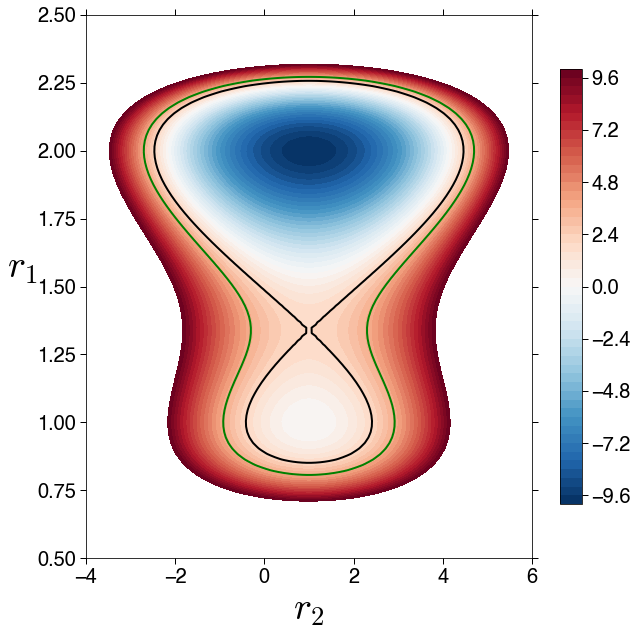

In [8]:

numpts = 100

figure_path = '../data-figures/pes-plots/'

# coeff_pe = [321.904484, -995.713452, 1118.689753, -537.856726, \
#             92.976121, 1.0, 1.0, 0.01]
coeff_pe = [321.904484, -995.713452, 1118.689573, -537.856726, \
            92.976121, 1.0, 1.0, 0.01]
# when c_8 = 0 
coeff_pe[-1] = 0.0 # coupling parameter
xVec = np.linspace(0.5, 2.5, numpts)
yVec = np.linspace(-4, 6, numpts)
pe_min = -10
pe_max = 10

fig_pes = plt.figure(figsize=(10,10))
ax_pes = fig_pes.gca()
plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_pes)

# fig_pes.savefig(figure_path + 'pes_contourf_nocoupling.png', dpi = 300, bbox_inches = 'tight')
print(coeff_pe)


### Observing the effects of the parameters in the potential energy

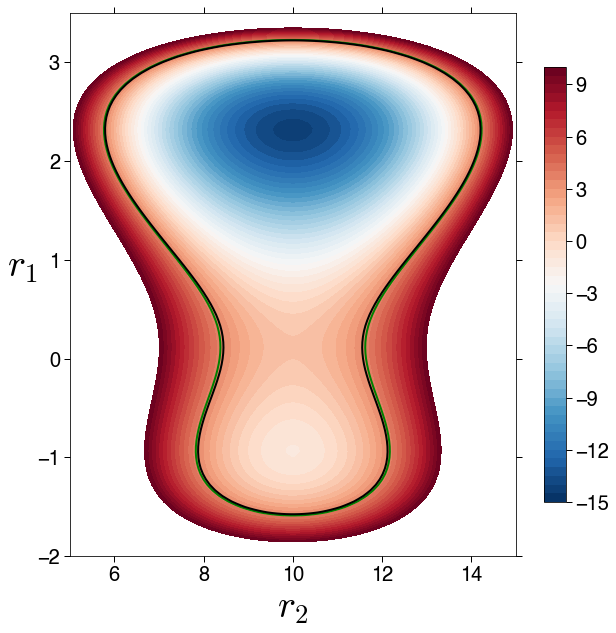

In [9]:
coeff_pe = [1, 1, -4, -2, 1, 1.0, 10.0, 0.1]
xVec = np.linspace(-2, 3.5, numpts)
yVec = np.linspace(5, 15, numpts)
pe_min = -15
pe_max = 10


fig_pes = plt.figure(figsize=(10,10))
ax_pes = fig_pes.gca()
plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_pes)



[321.904484, -995.713452, 1118.689573, -537.856726, 92.976121, 1.0, 1.0, 0.01]


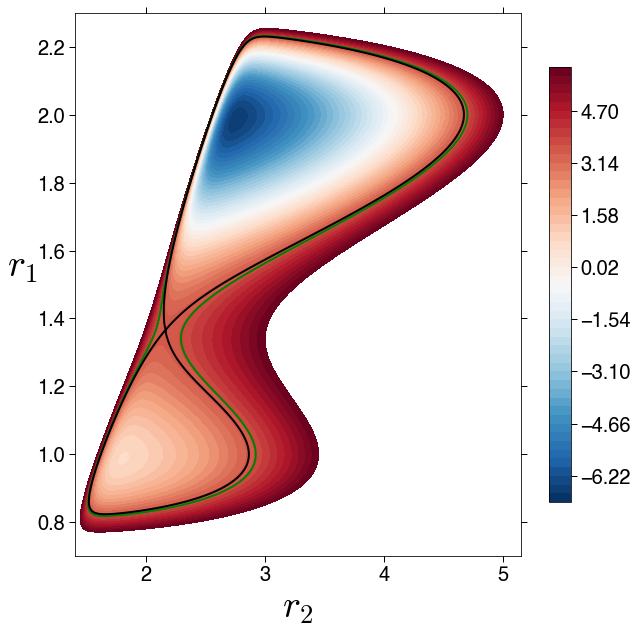

In [12]:

figure_path = '../data-figures/pes-plots/'

# coeff_pe = [321.904484, -995.713452, 1118.689753, -537.856726, \
#             92.976121, 1.0, 1.0, 0.01]
coeff_pe = [321.904484, -995.713452, 1118.689573, -537.856726, \
            92.976121, 1.0, 1.0, 0.01]
coeff_pe[-1] = 0.01
numpts = 300
xVec = np.linspace(0.7, 2.3, numpts)
yVec = np.linspace(1.4, 5.15, numpts)
# yVec = np.linspace(-4, 6, numpts)
pe_min = -7
pe_max = 6

fig_pes = plt.figure(figsize=(10,10))
ax_pes = fig_pes.gca()
plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_pes)

# fig_pes.savefig(figure_path + 'pes_contourf.png', dpi = 300, bbox_inches = 'tight')
print(coeff_pe)


### Finding the equilibrium points

from left to right:
center (EQNUM = 1)     saddle (EQNUM = 2)      center (EQNUM = 3)

In [10]:
from scipy import optimize

mu1 = 1
mu2 = 100.0
params = np.append([mu1, mu2],coeff_pe)
print(params)

eq_pt_1 = optimize.fsolve(solutesolventLJ2dof.grad_hamiltonian, [1.0, 1.75, 0, 0], args = params, \
                         xtol = 1e-12, maxfev = 1000)
print(eq_pt_1)
totalEnergyEqPt1 = solutesolventLJ2dof.potential_energy(eq_pt_1[0], eq_pt_1[1], params[2:])
print('Total energy: ' + str(totalEnergyEqPt1))


eq_pt_2 = optimize.fsolve(solutesolventLJ2dof.grad_hamiltonian, [1.5, 2.0, 0, 0], args = params, \
                          xtol = 1e-12, maxfev = 1000)
print(eq_pt_2)
totalEnergyEqPt2 = solutesolventLJ2dof.potential_energy(eq_pt_2[0], eq_pt_2[1], params[2:])
print('Total energy: ' + str(totalEnergyEqPt2))


eq_pt_3 = optimize.fsolve(solutesolventLJ2dof.grad_hamiltonian, [2.0, 2.5, 0, 0], args = params, \
                          xtol = 1e-12, maxfev = 1000)
print(eq_pt_3)
totalEnergyEqPt3 = solutesolventLJ2dof.potential_energy(eq_pt_3[0], eq_pt_3[1], params[2:])
print('Total energy: ' + str(totalEnergyEqPt3))


[ 1.00000000e+00  1.00000000e+02  3.21904484e+02 -9.95713452e+02
  1.11868975e+03 -5.37856726e+02  9.29761210e+01  1.00000000e+00
  1.00000000e+00  1.00000000e-02]
[9.87784224e-01 1.80660974e+00 2.94270529e-30 5.70109786e-28]
Total energy: 0.7705758853764298
[ 1.36561073e+00  2.16177424e+00  1.67558550e-28 -2.06855159e-29]
Total energy: 3.4732499031235338
[ 1.98516673e+00  2.75641493e+00 -1.62659069e-27  2.87385844e-25]
Total energy: -6.66213499005362


### Linear stability analysis of the equilibrium points

In [11]:
from numpy import linalg as LA

print('Parameters of the model:' + str(params))

jacobian_eq_pt_1 = solutesolventLJ2dof.jacobian(eq_pt_1[0], eq_pt_1[1], params)
w,v = LA.eig(jacobian_eq_pt_1)
print(w)

jacobian_eq_pt_2 = solutesolventLJ2dof.jacobian(eq_pt_2[0], eq_pt_2[1], params)
w,v = LA.eig(jacobian_eq_pt_2)
print(w)

jacobian_eq_pt_3 = solutesolventLJ2dof.jacobian(eq_pt_3[0], eq_pt_3[1], params)
w,v = LA.eig(jacobian_eq_pt_3)
print(w)


Parameters of the model:[ 1.00000000e+00  1.00000000e+02  3.21904484e+02 -9.95713452e+02
  1.11868975e+03 -5.37856726e+02  9.29761210e+01  1.00000000e+00
  1.00000000e+00  1.00000000e-02]
[ 1.16010309e-19+12.80369885j  1.16010309e-19-12.80369885j
 -5.56271615e-17 +0.48583835j -5.56271615e-17 -0.48583835j]
[ 7.16177482e+00+0.j         -7.16177482e+00+0.j
 -1.11022302e-16+0.82332513j -1.11022302e-16-0.82332513j]
[-8.65764054e-18+16.94704366j -8.65764054e-18-16.94704366j
  1.57843859e-16 +0.69984296j  1.57843859e-16 -0.69984296j]


In [12]:
jacobian_eq_pt_2

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-02],
       [ 5.10125504e+01,  3.79396063e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 3.79396063e+01, -3.99396063e+01,  0.00000000e+00,
         0.00000000e+00]])

## Plotting the unstable periodic orbits for solvent mass between 0.1 and 1.1

In [13]:

%matplotlib
from scipy.integrate import solve_ivp
from functools import partial

data_path = '../data-figures/upos-manifolds/'
# data_path = './tube-manifolds/'
solvent_mass_vals = np.arange(0.1,2.0,0.2) 
upo_init_conds = np.zeros((len(solvent_mass_vals),6))


coeff_pe[-1] = 0.01
mu1 = 1.0
numpts = 300
xVec = np.linspace(1.2, 1.55, numpts)
yVec = np.linspace(1.95, 2.5, numpts)
# xVec = np.linspace(0.7, 2.3, numpts)
# yVec = np.linspace(1.4, 5.15, numpts)
# yVec = np.linspace(-4, 6, numpts)
pe_min = -7
# pe_min = 3
pe_max = 6

rel_tol = 3e-14
abs_tol = 1e-14

fig_pes = plt.figure(figsize=(10,10))
ax_pes = fig_pes.gca()

plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_pes)


for idx, solvent_mass in enumerate(solvent_mass_vals):
    try:
        file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.0f'%(solvent_mass) \
                    + '_DelE0.21872_solutesolventLJ2dof.txt'

        upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
        
    except:
        file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.0f'%(solvent_mass) \
                    + '_DelE0.21872_solutesolventLJ2dof.txt'

        upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
    
    
    timespan = [0, upo_init_conds[idx,4]]
    parameters = np.append([mu1, solvent_mass],coeff_pe)
    odes_func = partial(solutesolventLJ2dof.vector_field, parameters)
    sol = solve_ivp(odes_func, timespan, upo_init_conds[idx,:4], dense_output = True, \
                    rtol = rel_tol, atol = abs_tol)
    
    ax_pes.scatter(upo_init_conds[idx,0], upo_init_conds[idx,1], s = 10, c = 'k')
    ax_pes.plot(sol.y[0,:], sol.y[1,:],label=r'$\mu_2 = %.2f$'%(solvent_mass))
    
    ax_pes.legend(loc="upper right", fontsize = label_size - 10)
    print(idx, solvent_mass)
#     print(upo_init_conds[4:])


# fig_pes.savefig(data_path + 'pes_upos.png', dpi = 300, bbox_inches = 'tight')    

Using matplotlib backend: MacOSX


OSError: ../data-figures/upos-manifolds/x0po_T_energyPO_eqPt2mass_solvent0_DelE0.21872_solutesolventLJ2dof.txt not found.

## Plotting the unstable periodic orbits for solvent mass between 0.1 and 1.1

In [1]:


# solvent_mass_vals = np.arange(0.1,1.1,0.1) 

# fig_pes = plt.figure(figsize=(5,5))
# ax_pes = fig_pes.gca()

# plot_PE_contours(xVec, yVec, pe_min, pe_max, coeff_pe, ax_pes)


# for idx, solvent_mass in enumerate(solvent_mass_vals):
#     try:
#         file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.2f'%(solvent_mass) \
#                     + '_DelE0.21872_solutesolventLJ2dof.txt'

#         upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
        
#     except:
#         file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.1f'%(solvent_mass) \
#                     + '_DelE0.21872_solutesolventLJ2dof.txt'

#         upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
        
        
# #     except:
# #         file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.0f'%(solvent_mass) \
# #                     + '_DelE0.21872_solutesolventLJ2dof.txt'

# #         upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
        
        
# #     else:
# #         file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.2f'%(solvent_mass) \
# #                     + '_DelE0.21872_solutesolventLJ2dof.txt'

# #         upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
        
# #     else:
# #         file_name = 'x0po_T_energyPO_eqPt2mass_solvent%.0f'%(solvent_mass) \
# #                     + '_DelE0.21872_solutesolventLJ2dof.txt'

# #         upo_init_conds[idx,:] = np.loadtxt(data_path + file_name)
    
#     timespan = [0, upo_init_conds[idx,4]]
#     parameters = np.append([mu1, solvent_mass],coeff_pe)
#     odes_func = partial(solutesolventLJ2dof.vector_field, parameters)
#     sol = solve_ivp(odes_func, timespan, upo_init_conds[idx,:4], dense_output = True, \
#                     rtol = rel_tol, atol = abs_tol)
    
#     ax_pes.scatter(upo_init_conds[idx,0], upo_init_conds[idx,1], s = 10, c = 'k')
#     ax_pes.plot(sol.y[0,:], sol.y[1,:])
    
    
    


In [3]:
# plt.close('all')